# K-Nearest-Neighbors
KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting 
of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a
function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

# Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

# Problem statement

Dataset:
The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald 
Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 
Four features were measured from each sample: the length and the width of the sepals and petals.

Source: https://archive.ics.uci.edu/ml/datasets/Iris

Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.

# Question 1
Import libraries and load the dataset

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv(r"C:\Users\divyakamat\PG_AI_ML\python\handson\iris.csv")
df.drop(labels= 'Id',axis = 1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,151.000000,150.000000,150.000000,151.000000
mean,5.843709,3.054000,3.758667,1.202649
std,0.825314,0.433594,1.764420,0.762185
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
def missing_values(df):
    #check null values 
    df_na = (df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :df_na})
    
    if (df_na.shape[0] != 0):
        f, ax = plt.subplots(figsize=(8, 6))
        plt.xticks(rotation='90')
        sns.barplot(x=df_na.index, y=df_na)
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of missing values', fontsize=15)
        plt.title('Percent missing data by feature', fontsize=15)
        
    return missing_data.head(22)

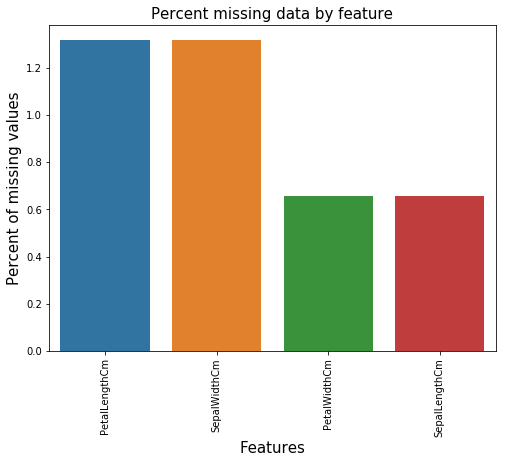

In [6]:
null_values = missing_values(df)
if null_values.shape[0] == 0:
    print ("There are no null values in the datasets")
else:
    null_values

# Data Pre-processing

# Question 2 - Estimating missing values
Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have 
to see how to replace those missing values with some estimated values (median)

In [7]:
df['SepalLengthCm'] = df['SepalLengthCm'].fillna(df['SepalLengthCm'].median())
df['SepalWidthCm'] = df['SepalWidthCm'].fillna(df['SepalWidthCm'].median())
df['PetalLengthCm'] = df['PetalLengthCm'].fillna(df['PetalLengthCm'].median())
df['PetalWidthCm'] = df['PetalWidthCm'].fillna(df['PetalWidthCm'].median())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Question 3 - Dealing with categorical data
Change all the classes to numericals (0to2).

In [9]:
df['Species'].value_counts()

Iris-virginica     52
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [10]:
df['Species'] = df['Species'].map({'Iris-virginica': 1, 'Iris-setosa': 2,'Iris-versicolor':3})
df['Species'].value_counts()

1    52
3    50
2    50
Name: Species, dtype: int64

# Question 4
Observe the association of each independent variable with target variable and drop variables from feature set having correlation 
in range -0.1 to 0.1 with target variable.

In [11]:
def density_plots(df):
    num_cols = list(df._get_numeric_data().columns)
    for i in range(0,len(num_cols),3):
        if len(num_cols) > i+2:
            plt.figure(figsize=(10,3))
            plt.subplot(131)
            sns.distplot(df[num_cols[i]], hist=True, kde=True)
            plt.subplot(132)            
            sns.distplot(df[num_cols[i+1]], hist=True, kde=True)
            plt.subplot(133)            
            sns.distplot(df[num_cols[i+2]], hist=True, kde=True)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(df[num_cols[i]], hist=True, kde=True)

C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


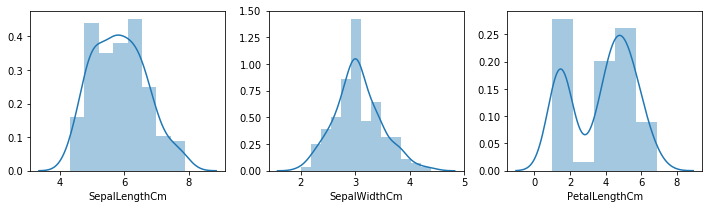

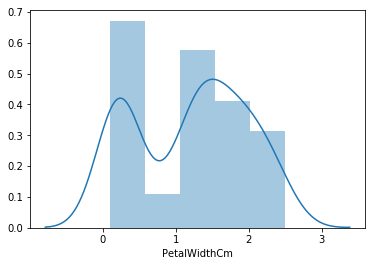

In [12]:
density_plots(df)

In [13]:
def correlation_matrix(df):
    X = df.iloc[:,:-1]  #independent columns
    y = df.iloc[:,-1]    #target column i.e price range
    #get correlations of each features in dataset
    corrmat = df.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(10,6))
    #plot heat map
    g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

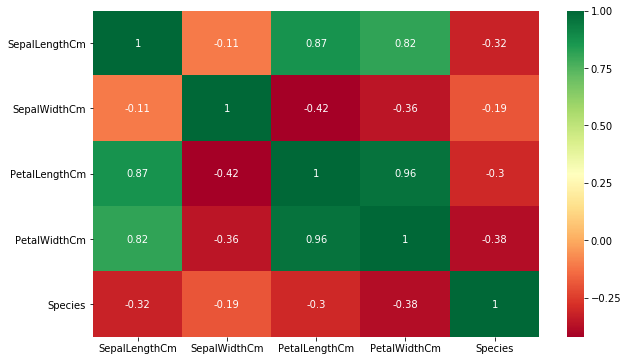

In [14]:
correlation_matrix(df)

In [15]:
df.drop('SepalWidthCm',axis=1, inplace=True)

There are no columns having correlation in range -0.1 to 0.1 with target variable. SepalWidth has a correlation of -0.11 but lets retain it.

# Question 5
Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). 
They will be having almost no influence on the classification.

In [16]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(X)

selector.variances_

array([0.67219356, 3.05627554, 0.57334444])

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [19]:
vif.round(1)

,VIF Factor,features
0,16.2,SepalLengthCm
1,94.7,PetalLengthCm
2,48.7,PetalWidthCm


# Question 6
Plot the scatter matrix for all the variables.

C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


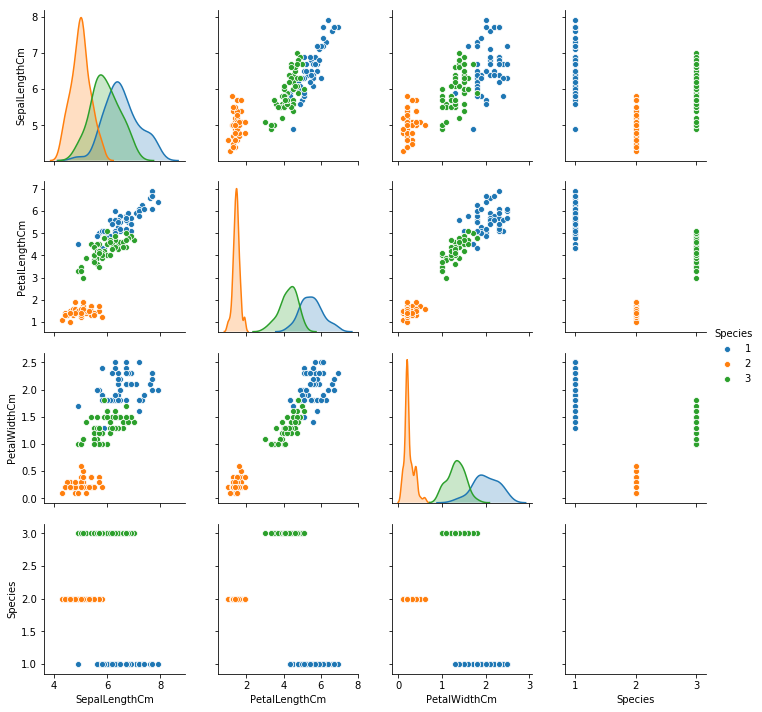

In [20]:
sns.pairplot(data=df,hue='Species')

# Split the dataset into training and test sets

# Question 7
Split the dataset into training and test sets with 80-20 ratio.

In [21]:
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score


X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20,stratify=y)


C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Question 8 - Model
Build the model and train and test on training and test sets respectively using scikit-learn. Print the Accuracy of the model with different values of k=3,5,9.

Hint: For accuracy you can check accuracy_score() in scikit-learn

In [22]:
scores = []
for k in [3,5,9]:
    NNH = KNeighborsClassifier(n_neighbors= k , weights = 'distance' )
    NNH.fit(X_train, y_train)
    predicted_labels = NNH.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, predicted_labels))
    
print(scores)


[0.967741935483871, 0.967741935483871, 0.9354838709677419]


# Question 9 - Cross Validation
Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis 
classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the 
model with lowest MSE

In [23]:

neighRange = range(1,20)
# We can create Python dictionary using [] or dict()
scores = []
for k in neighRange:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, pred))
    
print(scores)

[0.9354838709677419, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.9354838709677419, 0.967741935483871, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.967741935483871, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419]


In [24]:

#Recording the missclassification errors
missClass = [1 - x for x in scores]

# # determining best k
optimal_k = neighRange[missClass.index(min(missClass))]
print("The optimal number of neighbors is %d" % optimal_k)


The optimal number of neighbors is 2


# Question 10
Plot misclassification error vs k (with k value on X-axis) using matplotlib.

Text(0,0.5,'Miss Classification Error')

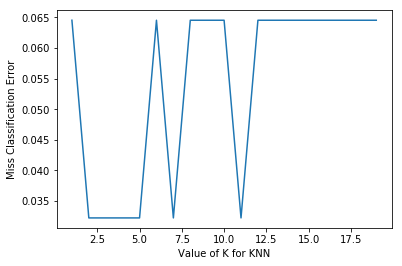

In [25]:
plt.plot(neighRange, missClass)
plt.xlabel('Value of K for KNN')
plt.ylabel('Miss Classification Error')

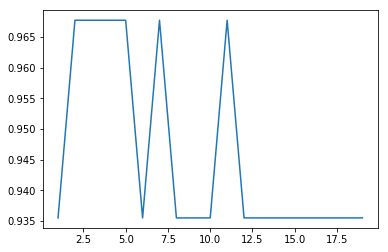

In [26]:
plt.plot(neighRange, scores)

In [27]:
optimal_k = neighRange[scores.index(max(scores))]
optimal_k

2

### Cross Validattion

In [30]:
#search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.9262820512820513, 0.9352564102564103, 0.9429487179487179, 0.9512820512820512, 0.9429487179487179, 0.9596153846153846, 0.9429487179487179, 0.9512820512820512, 0.9429487179487179, 0.9596153846153846, 0.9429487179487179, 0.9512820512820512, 0.9596153846153845, 0.9596153846153845, 0.9512820512820512, 0.9512820512820512, 0.9512820512820512, 0.9679487179487178, 0.9512820512820512, 0.9596153846153845, 0.9596153846153845, 0.9596153846153845, 0.9512820512820512, 0.9512820512820512, 0.9512820512820512, 0.942948717948718, 0.9512820512820512, 0.9512820512820512, 0.942948717948718, 0.9346153846153846]


Text(0,0.5,'Cross-Validated Accuracy')

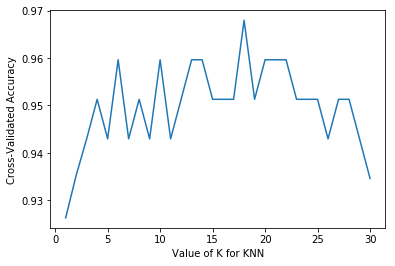

In [31]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Parameter tuning using GridSearchCV

In [33]:
from sklearn.grid_search import GridSearchCV

C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [34]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)

# we create a list
weight_options = ['uniform', 'distance']

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [35]:
param_grid = dict(n_neighbors=k_range,weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [36]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [37]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.92562, std: 0.05641, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.92562, std: 0.05641, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.93388, std: 0.07743, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.92562, std: 0.05641, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.94215, std: 0.05084, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.94215, std: 0.05084, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.95041, std: 0.05264, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.94215, std: 0.05084, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.94215, std: 0.05084, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.94215, std: 0.05084, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.95868, std: 0.05310, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.94215, std: 0.05084, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.94215, std: 0.05084, para

In [38]:

# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.9256198347107438, 0.9256198347107438, 0.9338842975206612, 0.9256198347107438, 0.9421487603305785, 0.9421487603305785, 0.9504132231404959, 0.9421487603305785, 0.9421487603305785, 0.9421487603305785, 0.9586776859504132, 0.9421487603305785, 0.9421487603305785, 0.9504132231404959, 0.9504132231404959, 0.9421487603305785, 0.9421487603305785, 0.9504132231404959, 0.9586776859504132, 0.9504132231404959, 0.9421487603305785, 0.9504132231404959, 0.9504132231404959, 0.9504132231404959, 0.9586776859504132, 0.9504132231404959, 0.9586776859504132, 0.9586776859504132, 0.9504132231404959, 0.9586776859504132, 0.9504132231404959, 0.9586776859504132, 0.9504132231404959, 0.9586776859504132, 0.9669421487603306, 0.9586776859504132, 0.9504132231404959, 0.9586776859504132, 0.9586776859504132, 0.9586776859504132, 0.9586776859504132, 0.9586776859504132, 0.9586776859504132, 0.9504132231404959, 0.9504132231404959, 0.9504132231404959, 0.9504132231404959, 0.9504132231404959, 0.9504132231404959, 0.9504132231404959,

In [39]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9669421487603306
{'n_neighbors': 18, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')


In [40]:

# train your model using all data and the best known parameters

# instantiate model with best parameters
knn = KNeighborsClassifier(n_neighbors=18, weights='uniform')

# fit with X and y, not X_train and y_train
# even if we use train/test split, we should train on X and y before making predictions on new data
# otherwise we throw away potential valuable data we can learn from
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')

In [46]:
y_predict = knn.predict(X_test)

# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases
knn.score(X_test,y_test)


0.9354838709677419

In [47]:
print(metrics.confusion_matrix(y_test, y_predict))

[[10  0  1]
 [ 0 10  0]
 [ 1  0  9]]


In [82]:
# df_out = pd.DataFrame(y_predict,columns=['y_predict'])
# df_test = pd.DataFrame(y_test)
# df_test = df_test.reset_index(drop=True)
pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_predict,columns=['y_predict'])],axis=1)

,Species,y_predict
0,3,3
1,2,2
2,2,2
3,1,1
4,1,1
5,1,1
6,3,3
7,2,2
8,1,1
9,2,2
